In [1]:
!pip install vaderSentiment


  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv("scrapped_data.csv", names=["comment", "time"], header=None)

analyzer = SentimentIntensityAnalyzer()

df["vader_scores"] = df["comment"].apply(lambda x: analyzer.polarity_scores(str(x)))
df["vader_compound"] = df["vader_scores"].apply(lambda score_dict: score_dict["compound"])

In [3]:
def label_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["vader_label"] = df["vader_compound"].apply(label_sentiment)

In [4]:
df.to_csv("comments_with_vader.csv", index=False)

In [5]:
df["vader_compound"].describe()

count    500.000000
mean      -0.012865
std        0.383261
min       -0.978100
25%       -0.296000
50%        0.000000
75%        0.000000
max        0.995500
Name: vader_compound, dtype: float64

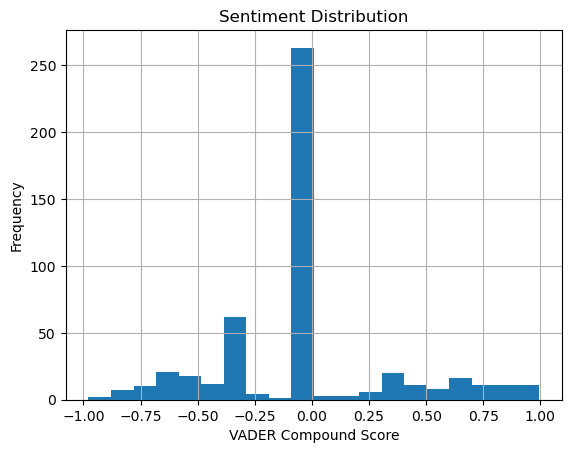

In [6]:
import matplotlib.pyplot as plt

df["vader_compound"].hist(bins=20)
plt.xlabel("VADER Compound Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution")
plt.show()


In [8]:
!pip install deep_translator

  Obtaining dependency information for deep_translator from https://files.pythonhosted.org/packages/38/3f/61a8ef73236dbea83a1a063a8af2f8e1e41a0df64f122233938391d0f175/deep_translator-1.11.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.3 MB/s eta 0:00:00


In [9]:
from deep_translator import GoogleTranslator

df["comment_en"] = df["comment"].apply(
    lambda x: GoogleTranslator(source="auto", target="en").translate(str(x))
)
df["vader_scores"] = df["comment_en"].apply(lambda x: analyzer.polarity_scores(str(x)))


In [10]:
df["compound"] = df["vader_scores"].apply(lambda score: score["compound"])
def label(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["compound"].apply(label)
df["sentiment"].value_counts()
df["sentiment"].value_counts(normalize=True) * 100
df["compound"].describe()


count    500.000000
mean       0.193312
std        0.531226
min       -0.983000
25%       -0.051600
50%        0.182800
75%        0.636900
max        0.995500
Name: compound, dtype: float64

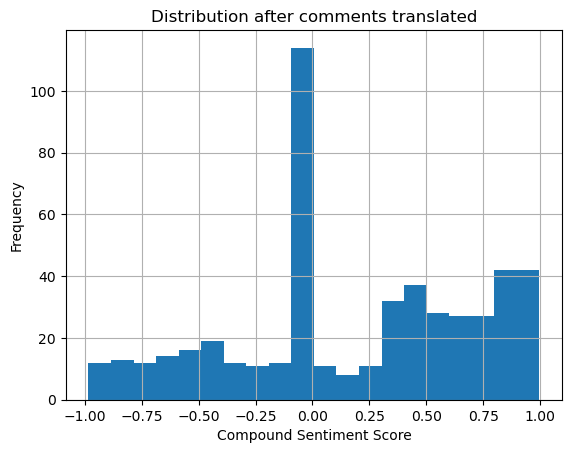

In [12]:
import matplotlib.pyplot as plt

df["compound"].hist(bins=20)
plt.title("Distribution after comments translated")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()


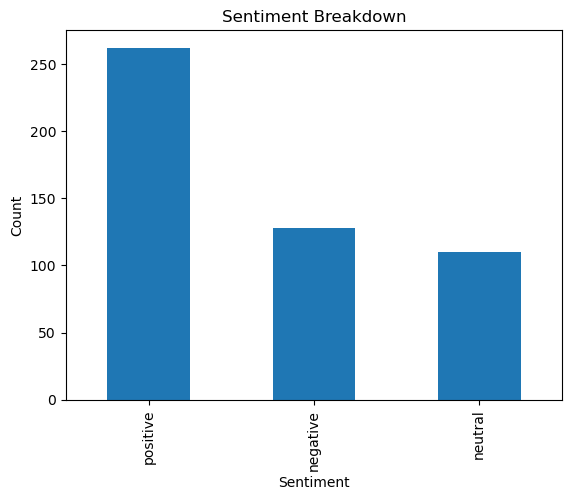

In [13]:
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Breakdown")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
